# Ch03. Linear Neural Networks
## 3.1 Linear Regression
### 3.1.1 Basic Elements of Linear Regression
#### Linear Model
$$
\hat{y}=w_1 x_1+\cdots+w_d x_d+b=\mathbf{w}^T\mathbf{x}+b
$$

$$
\hat{\mathbf{y}}=\mathbf{Xw}+b
$$

#### Loss Function
$$
L(\mathbf{W},b)=\frac1n\sum_{i=1}^n l^{(i)}(\mathbf{w},b)=\frac1n\sum_{i=1}^n\frac12(\mathbf{w}^T\mathbf{x}^{(i)}+b-y^{(i)})^2
$$

$$
\mathbf{x}^*,b^*=\arg\min_{\mathbf{w},b} L(\mathbf{w},b)
$$

$$
\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

#### Minibatch Stochastic Gradient Descent
$$
\begin{align*}

(\mathbf{w},b) 
    &\leftarrow 
    &(\mathbf{w},b) 
    &-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\partial_{(\mathbf{w},b)}l^{(i)}(\mathbf{w},b)\\

\mathbf{w} 
    &\leftarrow 
    &\mathbf{w} 
    &-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\partial_{\mathbf{x}}l^{(i)}(\mathbf{w},b) 
    &= \mathbf{w}-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\mathbf{x}^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b-y^{(i)})\\

b 
    &\leftarrow 
    &b 
    &-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\partial_{b}l^{(i)}(\mathbf{w},b) 
    &= b-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\mathbf{x}^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b-y^{(i)})
\end{align*}
$$

### Making Predictions with the Learned Model

### 3.1.2 Vectorization for Speed

In [1]:
%matplotlib inline
from d2l import mxnet as d2l
import math
from mxnet import np
import time

In [2]:
n=10000
a=np.ones(n)
b=np.ones(n)
a,b

(array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [4]:
class Timer:
    """Record multiple running times"""
    def __init__(self):
        self.times=[]
        self.start()
    def start(self):
        """Start the timer"""
        self.tik=time.time()
    def stop(self):
        """Stop the timer and record the time in a list"""
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    def avg(self):
        """Return the average time"""
        return sum(self.times)/len(self.times)
    def sum(self):
        """Return the sum of time"""
        return sum(self.times)
    def cumsum(self):
        """Return the accumulated time"""
        return np.array(self.times).cumsum().tolist()

In [5]:
c=np.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f} sec'

'1.93209 sec'

In [6]:
def add():
    c=np.zeros(n)
    for i in range(n):
        c[i]=a[i]+b[i]
# 使用魔法方法更简单
%timeit add()

1.9 s ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# ToDo:定义自己的类也可以通过装饰器模式完成

In [9]:
# 使用系统自带的向量运算速度更快
%timeit a+b

24.8 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 3.1.3 The Normal Distribution and Squared Loss
$$
p(x)=\frac1{\sqrt{2\pi\sigma^2}}\exp(-\frac1{2\sigma^2}(x-\mu)^2)
$$

In [10]:
# 正态分布的实现函数
def normal(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

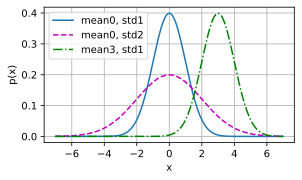

In [11]:
x=np.arange(-7,7,0.01)
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu, sigma in params],xlabel='x',ylabel='p(x)',
figsize=(4.5,2.5),legend=[f'mean{mu}, std{sigma}' for mu,sigma in params])

### 3.1.4 From Linear Regression to Deep Networks
#### Neural Network Diagram